<a href="https://colab.research.google.com/github/ronee12/Computer-Vision-Deep-learning-Work-Shop/blob/master/Simple_introdruction_to_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#designing 2D ConvNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
#importing dataset
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data() 

Text(0.5, 0, 'Value 5')

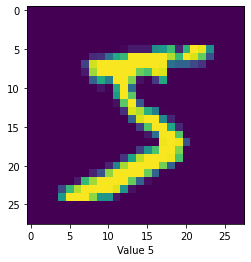

In [35]:
#Visualize one element
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,28))
plt.xlabel("Value {}".format(y_train[0]))

In [0]:
#preprocessing datasets

from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
print(X_train.shape,y_train.shape)


(60000, 28, 28, 1) (60000, 10)


In [39]:
#configure the cnn model and fit with dataset

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1842 - accuracy: 0.9443
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0221 - accuracy: 0.9931


In [40]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9902


In [42]:
print("Loss {} and accuracy {}".format(test_loss,test_acc))

Loss 0.03029240109026432 and accuracy 0.9901999831199646
